In [326]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Data fields
*ID* - an Id that represents a (Shop, Item) tuple within the test set<br>
*shop_id* - unique identifier of a shop<br>
*item_id* - unique identifier of a product<br>
*item_category_id* - unique identifier of item category<br>
*item_cnt_day* - number of products sold. You are predicting a monthly amount of this measure<br>
*item_price* - current price of an item<br>
*date* - date in format dd/mm/yyyy<br>
*date_block_num* - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33<br>
*item_name* - name of item<br>
*shop_name* - name of shop<br>
*item_category_name* - name of item category<br>
This dataset is permitted to be used for any purpose, including commercial use.<br>

kaggle competitions download -c competitive-data-science-predict-futur<br>

Importing dataset through pandas

In [120]:
items = pd.read_csv('.\competitive-data-science-predict-future-sales\items.csv')
sales = pd.read_csv('.\competitive-data-science-predict-future-sales\sales_train.csv')
test = pd.read_excel('./competitive-data-science-predict-future-sales/test.xls', index_col='ID')

Viewing data

In [121]:
test

,shop_id,item_id
ID,,
0,5,5037
1,5,5320
2,5,5233
3,5,5232
4,5,5268
...,...,...
65530,22,13099
65531,22,11827
65532,22,11345


In [108]:
test['shop_id'].unique()

array([ 5,  4,  6,  3,  2,  7, 10, 12, 28, 31, 26, 25, 22], dtype=int64)

In [34]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [101]:
items

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40
...,...,...,...
22165,"Ядерный титбит 2 [PC, Цифровая версия]",22165,31
22166,Язык запросов 1С:Предприятия [Цифровая версия],22166,54
22167,Язык запросов 1С:Предприятия 8 (+CD). Хрустале...,22167,49
22168,Яйцо для Little Inu,22168,62


In [56]:
new_item = items.drop('item_name',axis=1)

In [58]:
# removed item_name because its not going to gives us any useful information
new_item

,item_id,item_category_id
0,0,40
1,1,76
2,2,40
3,3,40
4,4,40
...,...,...
22165,22165,31
22166,22166,54
22167,22167,49
22168,22168,62


In [63]:
new_item['item_category_id'].value_counts()

40    5035
55    2365
37    1780
31    1125
58     790
      ... 
1        2
50       2
10       1
51       1
79       1
Name: item_category_id, Length: 84, dtype: int64

Text(0.5, 1.0, 'No. of items')

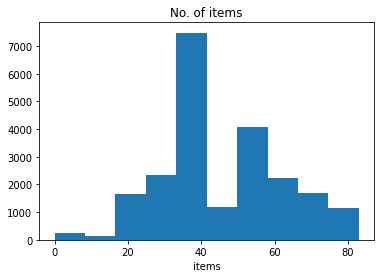

In [71]:
plt.hist(new_item['item_category_id'])
plt.xlabel('items')
plt.title('No. of items')

In [99]:
sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


In [216]:
new_sales = pd.merge(sales, new_item, on='item_id')

In [217]:
new_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,23.01.2013,0,24,22154,999.0,1.0,37
2,20.01.2013,0,27,22154,999.0,1.0,37
3,02.01.2013,0,25,22154,999.0,1.0,37
4,03.01.2013,0,25,22154,999.0,1.0,37
...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,40
2935845,01.10.2015,33,25,7903,12198.0,1.0,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,64


In [113]:
# no null values
new_sales.isna().sum()

date                0
date_block_num      0
shop_id             0
item_id             0
item_price          0
item_cnt_day        0
item_category_id    0
dtype: int64

## Exploration

(array([143479., 169798., 224692., 229460., 589871., 363667., 145621.,
        346972., 243490., 478799.]),
 array([ 0. ,  5.9, 11.8, 17.7, 23.6, 29.5, 35.4, 41.3, 47.2, 53.1, 59. ]),
 <BarContainer object of 10 artists>)

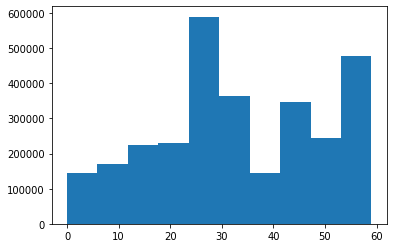

In [115]:
plt.hist(new_sales['shop_id'])

(array([252097., 478228., 405580., 302591., 215212., 233462., 297932.,
        274550., 239603., 236594.]),
 array([    0. ,  2216.9,  4433.8,  6650.7,  8867.6, 11084.5, 13301.4,
        15518.3, 17735.2, 19952.1, 22169. ]),
 <BarContainer object of 10 artists>)

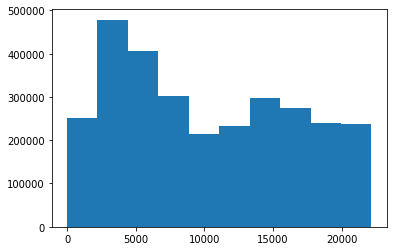

In [116]:
plt.hist(new_sales['item_id'])

(array([ 78118.,  26641., 505305., 537510., 858522.,  64240., 398892.,
        195895., 195545.,  75181.]),
 array([ 0. ,  8.3, 16.6, 24.9, 33.2, 41.5, 49.8, 58.1, 66.4, 74.7, 83. ]),
 <BarContainer object of 10 artists>)

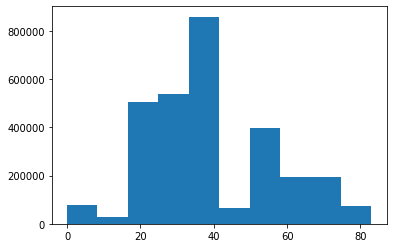

In [119]:
plt.hist(new_sales['item_category_id'])

In [122]:
new_sales['item_cnt_day'].unique()

array([ 1.000e+00, -1.000e+00,  3.000e+00,  2.000e+00,  4.000e+00,
        1.700e+01,  8.000e+00,  5.000e+00,  7.000e+00,  1.000e+01,
       -3.000e+00,  1.400e+01,  6.000e+00,  2.200e+01,  1.500e+01,
        2.700e+01,  1.100e+01,  4.700e+01,  5.000e+01,  9.000e+00,
        2.000e+01,  2.500e+01,  1.300e+01,  1.600e+01,  5.600e+01,
        1.900e+01,  6.100e+01,  1.200e+01,  3.000e+01,  3.400e+01,
        1.800e+01,  3.100e+01,  3.300e+01,  2.100e+01,  3.800e+01,
        2.600e+01,  8.200e+01,  4.400e+01,  2.400e+01,  2.000e+02,
        1.000e+02,  2.900e+01,  3.900e+01,  2.800e+01,  4.600e+01,
        3.200e+01,  4.000e+01,  3.500e+01,  4.100e+01,  7.000e+01,
        6.400e+01, -2.000e+00,  4.500e+01,  7.100e+01,  6.500e+01,
        3.600e+01,  1.500e+02,  8.000e+01,  4.300e+01,  1.330e+02,
        5.100e+01,  9.000e+01,  4.200e+01,  3.700e+01,  6.200e+01,
        2.300e+01, -4.000e+00,  5.200e+01, -2.200e+01,  6.000e+01,
       -5.000e+00, -6.000e+00,  5.300e+01,  1.030e+02,  1.110e

In [339]:
extracted_date_sales = new_sales.copy()

In [340]:
extracted_date_sales.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,37
1,23.01.2013,0,24,22154,999.0,1.0,37
2,20.01.2013,0,27,22154,999.0,1.0,37
3,02.01.2013,0,25,22154,999.0,1.0,37
4,03.01.2013,0,25,22154,999.0,1.0,37


In [341]:
#excratcing day 
extracted_date_sales['day'] = extracted_date_sales['date'].map(lambda x: int(x.split('.')[0]))

In [342]:
#excratcing month
extracted_date_sales['month'] = extracted_date_sales['date'].map(lambda x: int(x.split('.')[1]))

In [343]:
#excratcing month
extracted_date_sales['year'] = extracted_date_sales['date'].map(lambda x: int(x.split('.')[2]))

In [223]:
extracted_date_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
0,02.01.2013,0,59,22154,999.0,1.0,37,02,01,2013
1,23.01.2013,0,24,22154,999.0,1.0,37,23,01,2013
2,20.01.2013,0,27,22154,999.0,1.0,37,20,01,2013
3,02.01.2013,0,25,22154,999.0,1.0,37,02,01,2013
4,03.01.2013,0,25,22154,999.0,1.0,37,03,01,2013
...,...,...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,40,17,10,2015
2935845,01.10.2015,33,25,7903,12198.0,1.0,15,01,10,2015
2935846,29.10.2015,33,25,7610,2890.0,1.0,64,29,10,2015
2935847,22.10.2015,33,25,7635,2100.0,1.0,64,22,10,2015


In [227]:
# montly sales
montly_sales = extracted_date_sales.groupby(['date_block_num','item_price','item_cnt_day'])['date','item_price','item_cnt_day'].agg(
    {'date':['min','max'],'item_price':'mean', 'item_cnt_day':'sum'})

C:\Users\AMD\AppData\Local\Temp/ipykernel_14304/3932278870.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  montly_sales = extracted_date_sales.groupby(['date_block_num','item_price','item_cnt_day'])['date','item_price','item_cnt_day'].agg(


In [228]:
montly_sales

date             item_price  \
                                               min         max       mean   
date_block_num item_price item_cnt_day                                      
0              9.0        1.0           15.01.2013  15.01.2013        9.0   
                          2.0           05.01.2013  08.01.2013        9.0   
                          3.0           01.01.2013  07.01.2013        9.0   
                          4.0           04.01.2013  04.01.2013        9.0   
               10.0       1.0           19.01.2013  31.01.2013       10.0   
...                                            ...         ...        ...   
33             37991.0    1.0           26.10.2015  26.10.2015    37991.0   
                          2.0           29.10.2015  29.10.2015    37991.0   
               40991.0    1.0           22.10.2015  22.10.2015    40991.0   
               41990.0    1.0           20.10.2015  22.10.2015    41990.0   
               42990.0    1.0           20.10.2015  29.10.2015    42990.0   

                                       item_cnt_day  
                                                sum  
date_block_num item_price item_cnt_day               
0              9.0        1.0                   1.0  
                          2.0                   4.0  
                          3.0                   9.0  
                          4.0                   4.0  
               10.0       1.0                   2.0  
...                                             ...  
33             37991.0    1.0                   1.0  
                          2.0                   2.0  
               40991.0    1.0                   1.0  
               41990.0    1.0                   3.0  
               42990.0    1.0                   4.0  

[87785 rows x 4 columns]

In [229]:
sales_by_month = extracted_date_sales.groupby('date_block_num')['item_cnt_day'].sum()

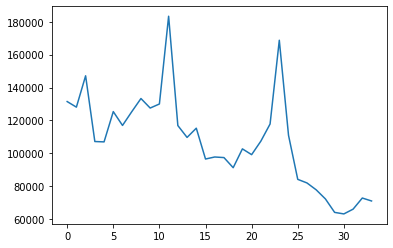

In [231]:
plt.plot(sales_by_month)

In [328]:
extracted_date_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
0,02.01.2013,0,59,22154,999.0,1.0,37,02,01,2013
1,23.01.2013,0,24,22154,999.0,1.0,37,23,01,2013
2,20.01.2013,0,27,22154,999.0,1.0,37,20,01,2013
3,02.01.2013,0,25,22154,999.0,1.0,37,02,01,2013
4,03.01.2013,0,25,22154,999.0,1.0,37,03,01,2013
...,...,...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,40,17,10,2015
2935845,01.10.2015,33,25,7903,12198.0,1.0,15,01,10,2015
2935846,29.10.2015,33,25,7610,2890.0,1.0,64,29,10,2015
2935847,22.10.2015,33,25,7635,2100.0,1.0,64,22,10,2015


If date date_block_num is not given how to get it from date

In [302]:
date_block = extracted_date_sales['date']

In [320]:
arr = []
for i in date_block:  
    if i.split('.')[1:] not in arr:
        arr.append(i.split('.')[1:])
arr

[['01', '2013'],
 ['02', '2013'],
 ['03', '2013'],
 ['04', '2013'],
 ['08', '2013'],
 ['09', '2013'],
 ['10', '2013'],
 ['12', '2013'],
 ['07', '2015'],
 ['08', '2015'],
 ['09', '2015'],
 ['10', '2015'],
 ['05', '2013'],
 ['07', '2013'],
 ['06', '2014'],
 ['05', '2015'],
 ['06', '2013'],
 ['11', '2013'],
 ['01', '2014'],
 ['02', '2014'],
 ['03', '2014'],
 ['07', '2014'],
 ['08', '2014'],
 ['10', '2014'],
 ['04', '2014'],
 ['01', '2015'],
 ['05', '2014'],
 ['09', '2014'],
 ['11', '2014'],
 ['12', '2014'],
 ['02', '2015'],
 ['03', '2015'],
 ['04', '2015'],
 ['06', '2015']]

In [321]:
for i,j in zip(arr,range(len(arr))):
    i.append(j)
arr

[['01', '2013', 0],
 ['02', '2013', 1],
 ['03', '2013', 2],
 ['04', '2013', 3],
 ['08', '2013', 4],
 ['09', '2013', 5],
 ['10', '2013', 6],
 ['12', '2013', 7],
 ['07', '2015', 8],
 ['08', '2015', 9],
 ['09', '2015', 10],
 ['10', '2015', 11],
 ['05', '2013', 12],
 ['07', '2013', 13],
 ['06', '2014', 14],
 ['05', '2015', 15],
 ['06', '2013', 16],
 ['11', '2013', 17],
 ['01', '2014', 18],
 ['02', '2014', 19],
 ['03', '2014', 20],
 ['07', '2014', 21],
 ['08', '2014', 22],
 ['10', '2014', 23],
 ['04', '2014', 24],
 ['01', '2015', 25],
 ['05', '2014', 26],
 ['09', '2014', 27],
 ['11', '2014', 28],
 ['12', '2014', 29],
 ['02', '2015', 30],
 ['03', '2015', 31],
 ['04', '2015', 32],
 ['06', '2015', 33]]

In [323]:
corr = extracted_date_sales.corr()

<AxesSubplot:>

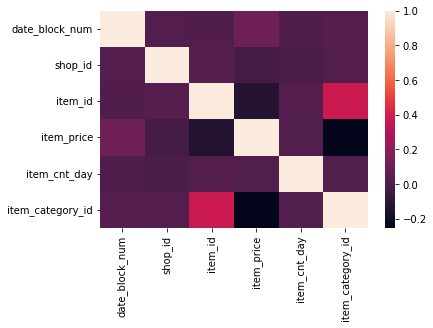

In [329]:
sns.heatmap(corr)

<AxesSubplot:xlabel='item_category_id', ylabel='item_id'>

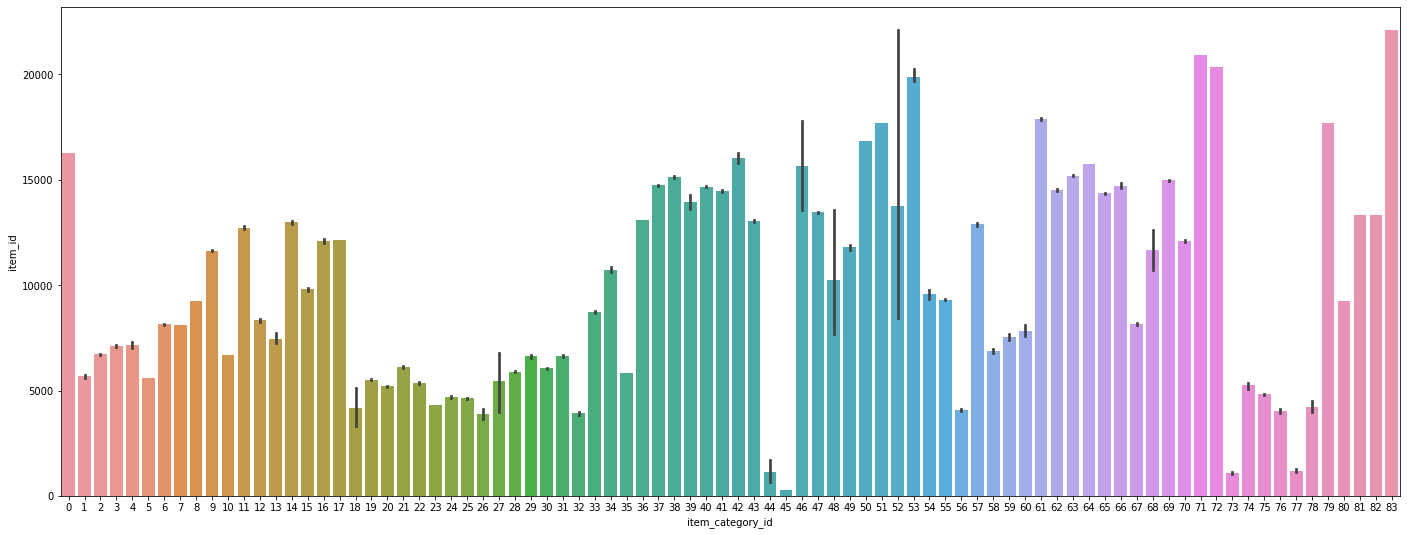

In [332]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.barplot(x=extracted_date_sales['item_category_id'], y=extracted_date_sales['item_id'], data=extracted_date_sales)

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='date_block_num', ylabel='count'>

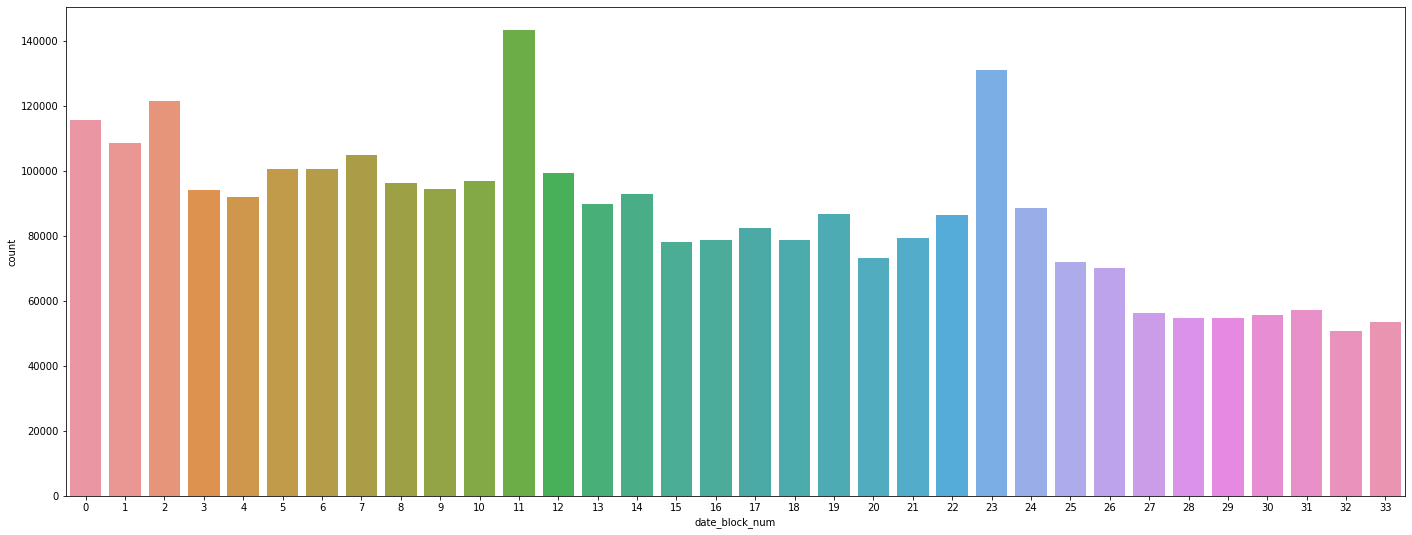

In [333]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.countplot(extracted_date_sales['date_block_num'])

In [334]:
extracted_date_sales['shop_id'].nunique()

60

In [335]:
extracted_date_sales['item_category_id'].nunique()

84

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='day', ylabel='count'>

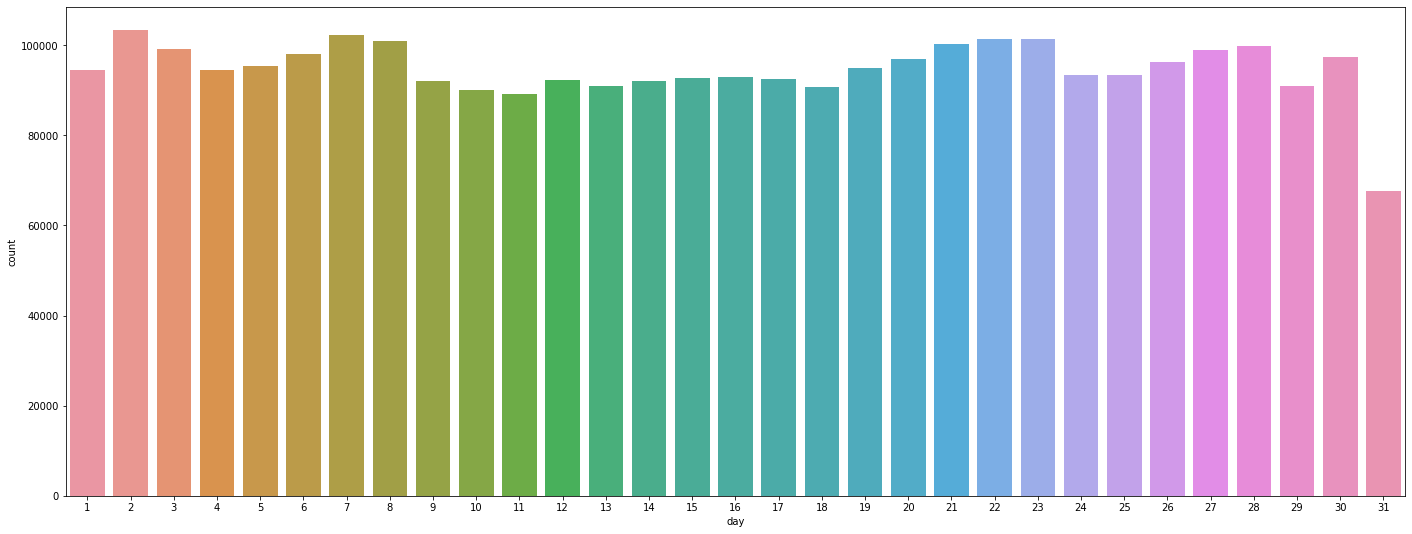

In [344]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.countplot(extracted_date_sales['day'])

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

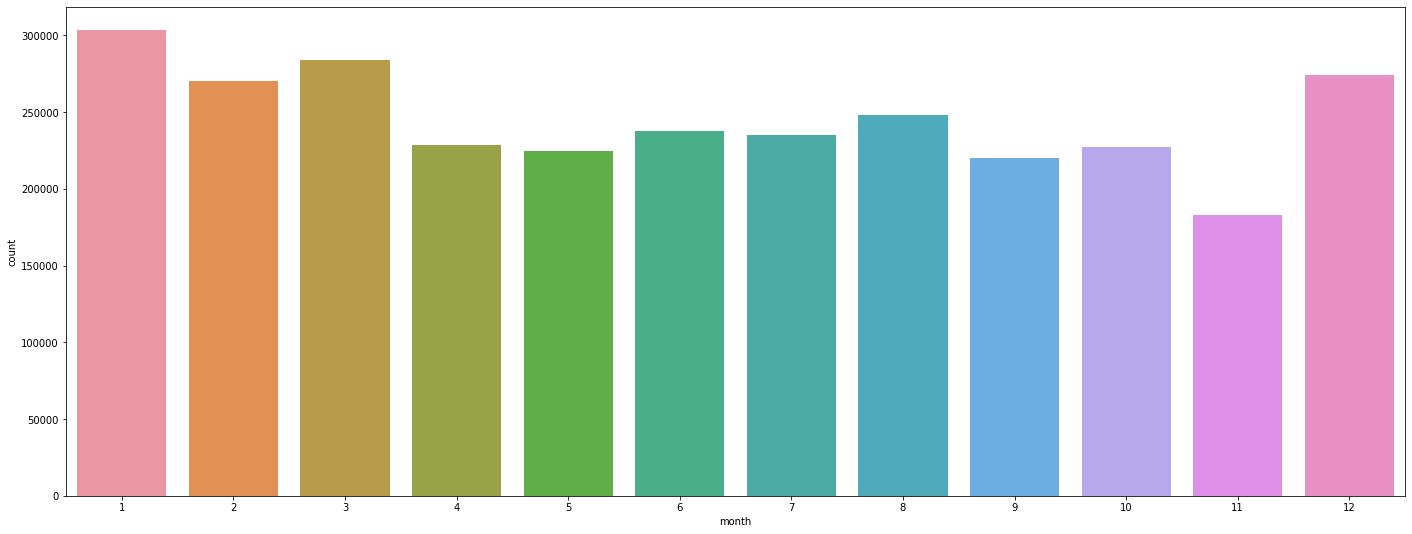

In [345]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.countplot(extracted_date_sales['month'])

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

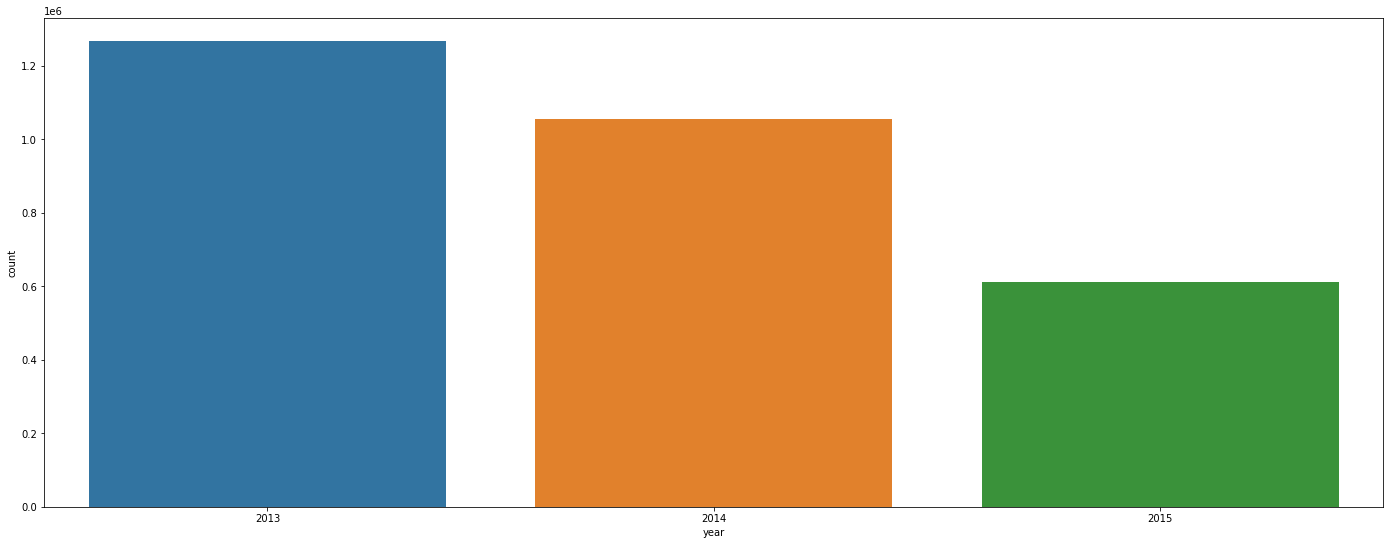

In [346]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.countplot(extracted_date_sales['year'])

<AxesSubplot:xlabel='shop_id', ylabel='count'>

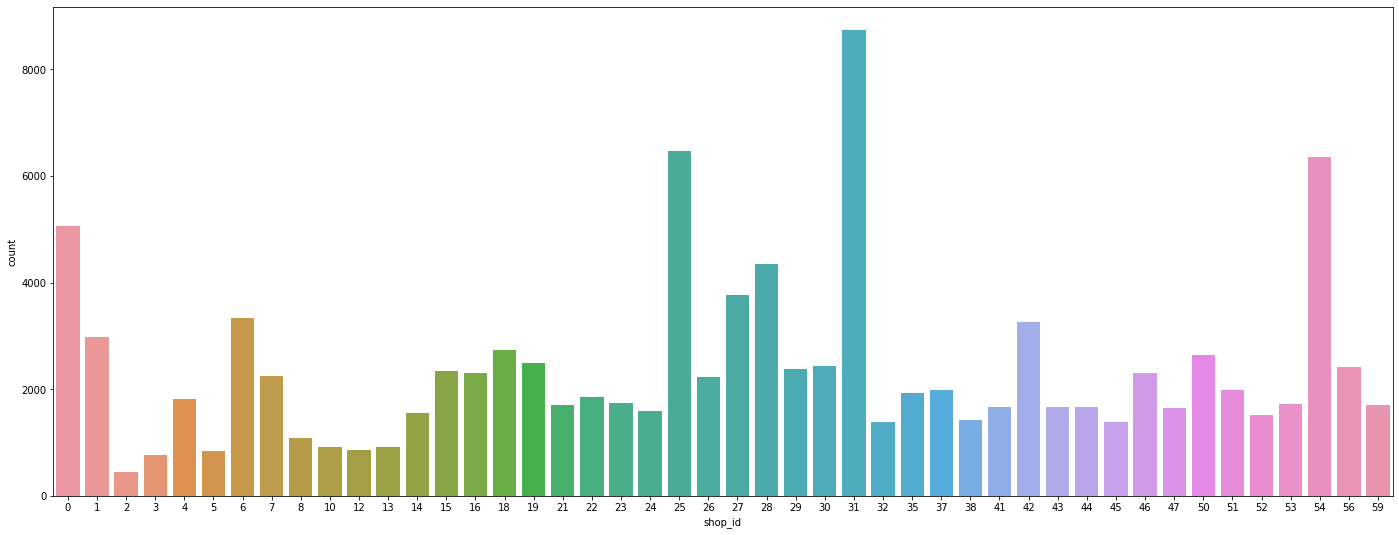

In [349]:
sns.countplot(extracted_date_sales[(extracted_date_sales['year'] == 2013) & (extracted_date_sales['month'] == 2)]['shop_id'])

before changes

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_price'>

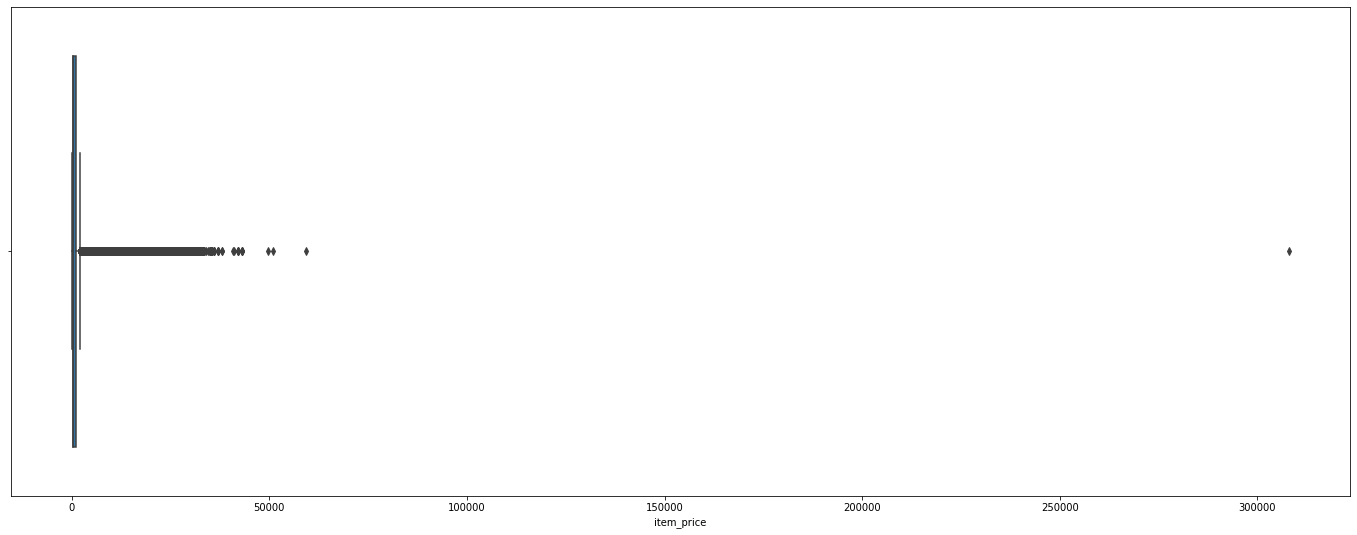

In [398]:
sns.boxplot(extracted_date_sales.item_price)

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_cnt_day'>

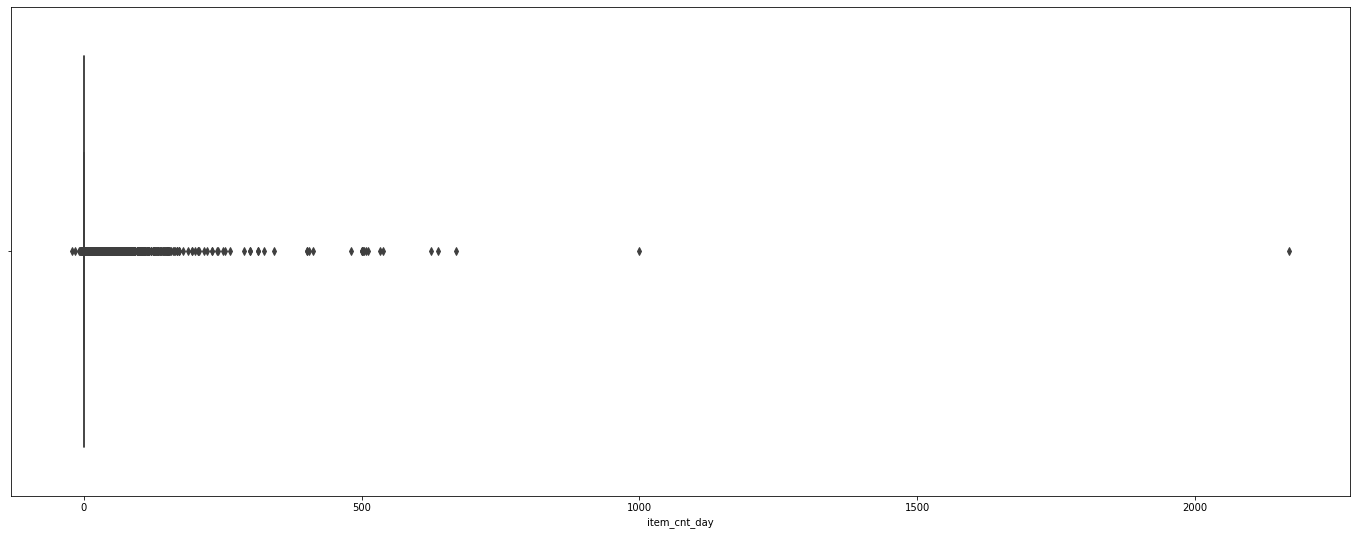

In [397]:
sns.boxplot(extracted_date_sales.item_cnt_day)

In [403]:
new_extracted_date_sales = extracted_date_sales[extracted_date_sales['item_price']< 90000]

In [408]:
new_extracted_date_sales = new_extracted_date_sales[extracted_date_sales['item_cnt_day']< 800]

C:\Users\AMD\AppData\Local\Temp/ipykernel_14304/1744588492.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_extracted_date_sales = new_extracted_date_sales[extracted_date_sales['item_cnt_day']< 800]


In [381]:
new_extracted_date_sales.shape

(2935847, 10)

In [370]:
new_extracted_date_sales

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
0,02.01.2013,0,59,22154,999.0,1.0,37,2,1,2013
1,23.01.2013,0,24,22154,999.0,1.0,37,23,1,2013
2,20.01.2013,0,27,22154,999.0,1.0,37,20,1,2013
3,02.01.2013,0,25,22154,999.0,1.0,37,2,1,2013
4,03.01.2013,0,25,22154,999.0,1.0,37,3,1,2013
...,...,...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,40,17,10,2015
2935845,01.10.2015,33,25,7903,12198.0,1.0,15,1,10,2015
2935846,29.10.2015,33,25,7610,2890.0,1.0,64,29,10,2015
2935847,22.10.2015,33,25,7635,2100.0,1.0,64,22,10,2015


In [392]:
new_extracted_date_sales[new_extracted_date_sales['item_price']<0].index

Int64Index([56049], dtype='int64')

In [405]:
# for multliple values
for i in new_extracted_date_sales[new_extracted_date_sales['item_price']<0].index:
    new_extracted_date_sales.drop(i, axis=0, inplace=True)

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [410]:
new_extracted_date_sales['item_cnt_day'] = new_extracted_date_sales['item_cnt_day'].map(lambda x: 0 if x<0 else x)

after changes

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_price'>

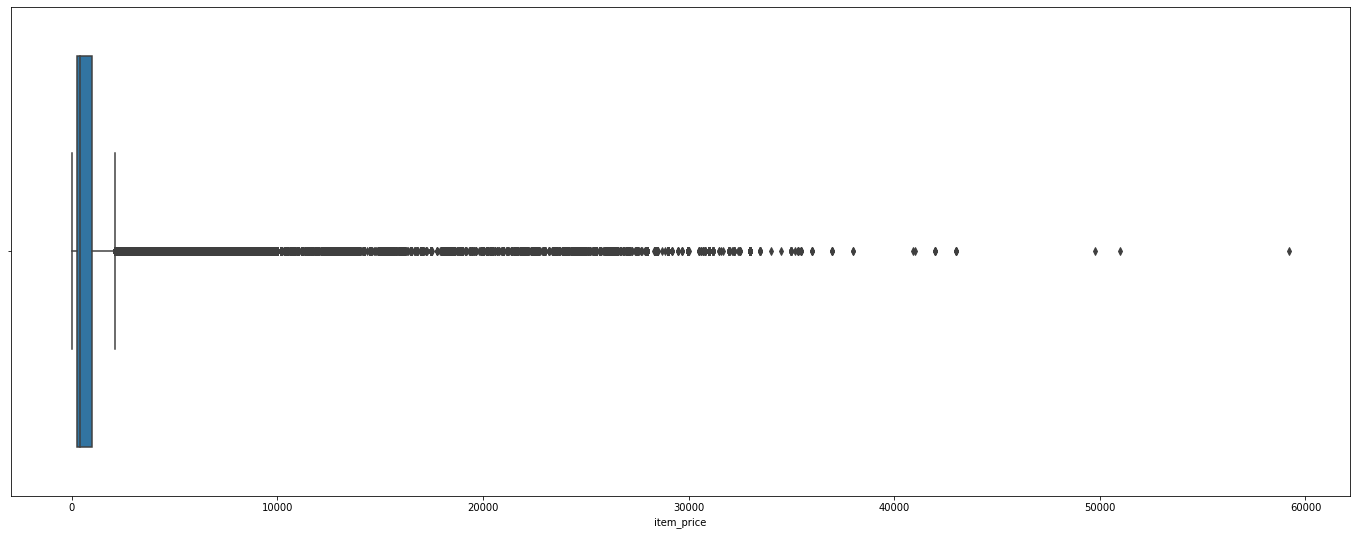

In [406]:
sns.boxplot(new_extracted_date_sales.item_price)

C:\ProgramData\Anaconda3\envs\Python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_cnt_day'>

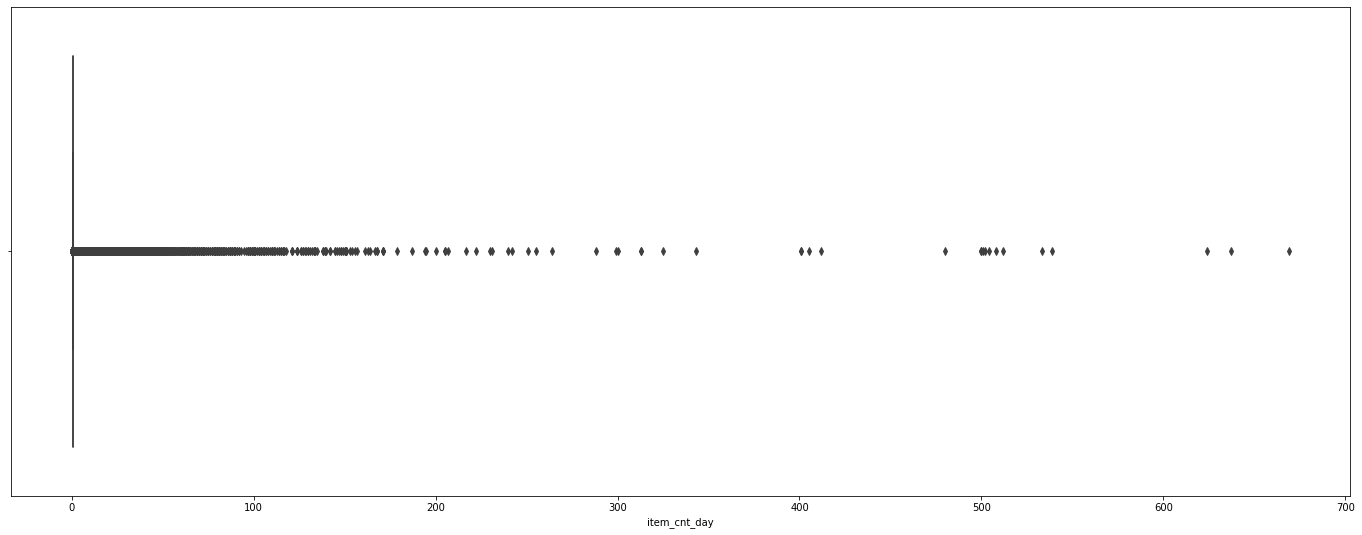

In [411]:
sns.boxplot(new_extracted_date_sales.item_cnt_day)

In [413]:
new_extracted_date_sales.drop('date',axis=1, inplace=True)

In [414]:
new_extracted_date_sales

,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_id,day,month,year
0,0,59,22154,999.0,1.0,37,2,1,2013
1,0,24,22154,999.0,1.0,37,23,1,2013
2,0,27,22154,999.0,1.0,37,20,1,2013
3,0,25,22154,999.0,1.0,37,2,1,2013
4,0,25,22154,999.0,1.0,37,3,1,2013
...,...,...,...,...,...,...,...,...,...
2935844,33,25,8428,249.0,1.0,40,17,10,2015
2935845,33,25,7903,12198.0,1.0,15,1,10,2015
2935846,33,25,7610,2890.0,1.0,64,29,10,2015
2935847,33,25,7635,2100.0,1.0,64,22,10,2015


In [432]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

In [437]:
y = new_extracted_date_sales['item_cnt_day'].to_list()

In [438]:
X = new_extracted_date_sales.drop('item_cnt_day',axis=1)

In [449]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)

In [456]:
from sklearn.ensemble import RandomForestRegressor

In [459]:
lr = RandomForestRegressor()

In [ ]:
lr.fit(X_train,y_train)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
accuracy_score(y_test,y_pred)